In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%load_ext lab_black

In [2]:
def build_loss_df(series):
    colnames = series.index.tolist()
    values = series.explode().values.reshape(-1, len(colnames))
    return pd.DataFrame(values, columns=colnames).astype(float)

In [59]:
# hist_fpath = "checkpoint/pop2jazz_2022-05-08_base_1/history/losses.json"
# hist_fpath = "checkpoint/CP_C2CP_P_2022-05-07_base_0.01/history/losses.json"
hist_fpath = "checkpoint/JC_J2JC_C_2022-05-08_base_1/history/losses.json"


with open(hist_fpath, "r") as jfile:
    data = json.load(jfile)

lr = data.pop("learning_rate")

hist = pd.DataFrame(data)
gen_hist = build_loss_df(hist["generator"].dropna())
d_hist = build_loss_df(hist["discriminator"].dropna())

FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint/JC_J2JC_C_2022-05-08_base_1/history/losses.json'

In [54]:
gen_hist.describe()

,cycle_loss,g_A2B_loss,g_B2A_loss,g_loss
count,1402.000000,1402.000000,1402.000000,1402.000000
mean,148.581746,165.289512,80.569713,385.823376
std,2672.963680,2227.281079,902.440332,8587.255641
min,0.939245,0.972494,0.997024,0.981097
25%,5.402919,5.399839,5.410766,5.346486
50%,6.341691,6.365379,6.355175,6.327636
75%,14.783576,14.526025,14.416544,14.690113
max,70266.120000,41508.380000,21149.867000,227118.050000


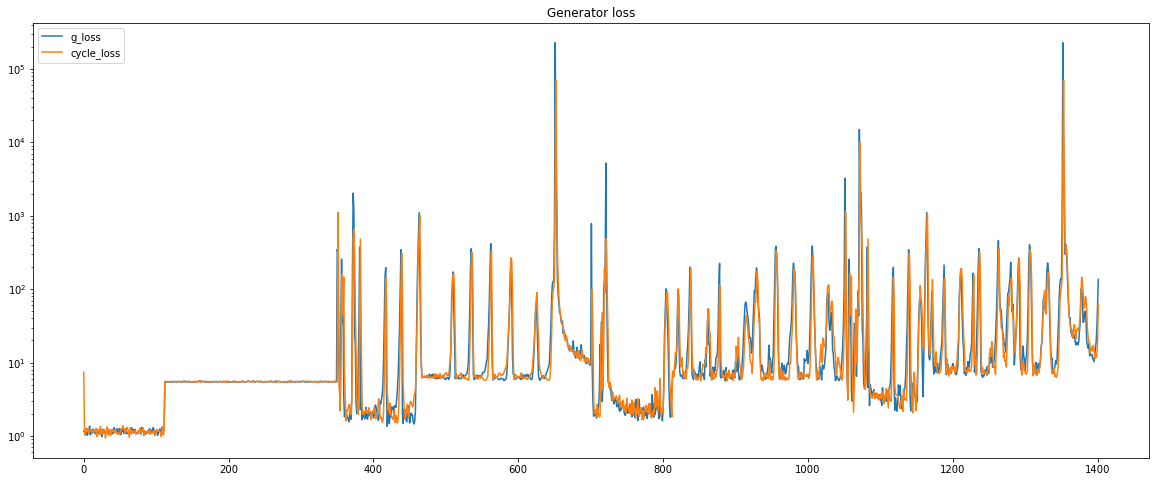

In [57]:
gen_hist[["g_loss", "cycle_loss"]].plot(figsize=(20, 8), title="Generator loss")
# plt.vlines(912 * np.arange(1, 30), 1, 5, linestyles=":")

# gen_hist[["g_A2B_loss", "g_B2A_loss"]].plot(figsize=(20, 8), title="Generator loss")
plt.yscale("log")
# plt.ylim([0.5, 2.2])
# plt.xlim([0, 3000])
plt.show()

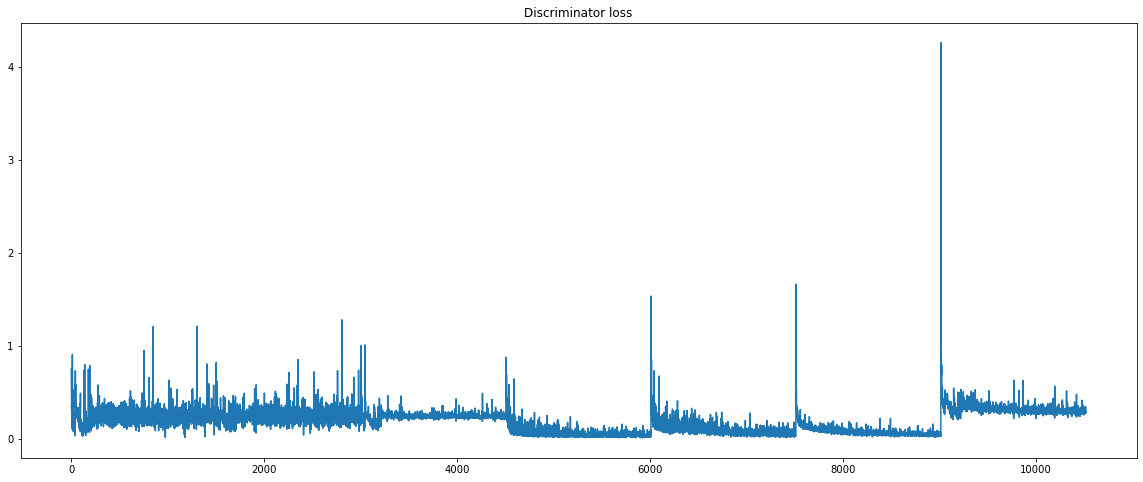

In [37]:
d_hist["d_loss"].plot(figsize=(20, 8), title="Discriminator loss")
# plt.vlines(912 * np.arange(1, 30), 1, 5, linestyles=":")

# plt.yscale("log")
plt.show()